# 6.5: Unsupervised Machine Learning: Clustering

Objective: Conduct unsupervised macine learning- k-means clustering algorithm - uncover patterns in your data that aren’t otherwise visible.

This script contains the following:

## 1. [Import Libraries/Dataframe](#import_libraries)

## 2. [The Elbow Technique](#elbow_technique)

## 3. [K-means Clustering](#clustering)

## 4. [Descriptive Statistics](#Dep)

# 1. Import Libraries/Dataframe<a id='import_libraries'></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [ ]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [ ]:
path = r'/content/drive/MyDrive/Careerfoundary/Section 6_University_Ranking'

In [ ]:
df_data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'df_data_cleaned_dervived.csv'), index_col=False)

In [ ]:
df_data.head(1)

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,Ranking_Category,world_rank_percentage
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.0,2012,Top_Rank_University,100.0


In [ ]:
#Delete unnamed column
df_data= df_data.drop('Unnamed: 0', axis=1)

In [ ]:
df_data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,Ranking_Category,world_rank_percentage
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012,Top_Rank_University,100.0000
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012,Top_Rank_University,99.8999
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012,Top_Rank_University,99.7998
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Top_Rank_University,99.6997
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012,Top_Rank_University,99.5996


In [ ]:
df_data.shape

(2200, 15)

In [ ]:
# Data has been cleaned.

In [ ]:
# Create a subset of only numerical variables
# I will be using world_rank insetad of world_rank_percentage so data is standardised.
# I will also remove score as the values are much larger than the rankings.

In [ ]:
# Create subset
df = df_data[['world_rank', 'national_rank','quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'patents']]

In [ ]:
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,1,1,7,9,1,1,1,1,5
1,2,2,9,17,3,12,4,4,1
2,3,3,17,11,5,4,2,2,15
3,4,1,10,24,4,16,16,11,50
4,5,4,2,29,7,37,22,22,18


# 2. The Elbow Technique<a id='elbow_technique'></a>

In [ ]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [ ]:
kmeans = [KMeans(n_clusters=i, n_init='auto') for i in range(1, 10)]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option.

In [ ]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option.

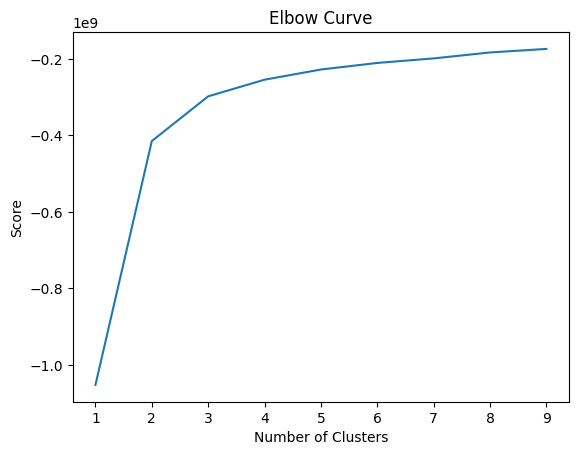

In [ ]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I have decided upon 4 clusters as the curve of the graph starts to flatten at 4 clusters.

# 3. K-means Clustering<a id='clustering'></a>

In [ ]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [ ]:
# Fit the k-means object to the data.

kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [ ]:
df['clusters'] = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-19-9637e709d8c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [ ]:
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,clusters
0,1,1,7,9,1,1,1,1,5,1
1,2,2,9,17,3,12,4,4,1,1
2,3,3,17,11,5,4,2,2,15,1
3,4,1,10,24,4,16,16,11,50,1
4,5,4,2,29,7,37,22,22,18,1


In [ ]:
df['clusters'].value_counts()

,count
clusters,
0,695
3,589
1,462
2,454


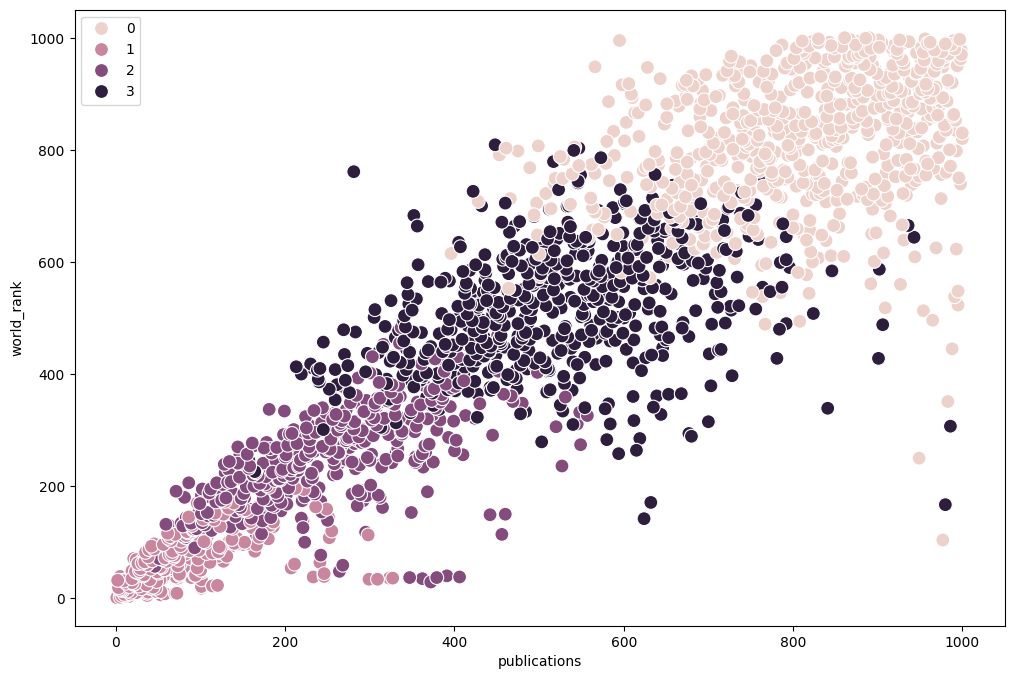

In [ ]:
# Plot the clusters for the "publications" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['publications'], y=df['world_rank'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('publications') # Label x-axis.
plt.ylabel('world_rank') # Label y-axis.
plt.show()


**Publications vs World Rank**

We can see that there is a very strong linear relationship between publications and world rank. Publications refers to the number of research publications they have produced. The clusters help us see that most high ranking universities in cluster 2 have a high publication ranking with the lowest publication ranking for this cluster at 350 which included the outliers.

We can see that amonng the low ranking universities in cluster 1 there is only one univerity that fall in the top 200 in terms on world rank.

This shows the publication rank of a univeristy is very important when looking at the world rank.


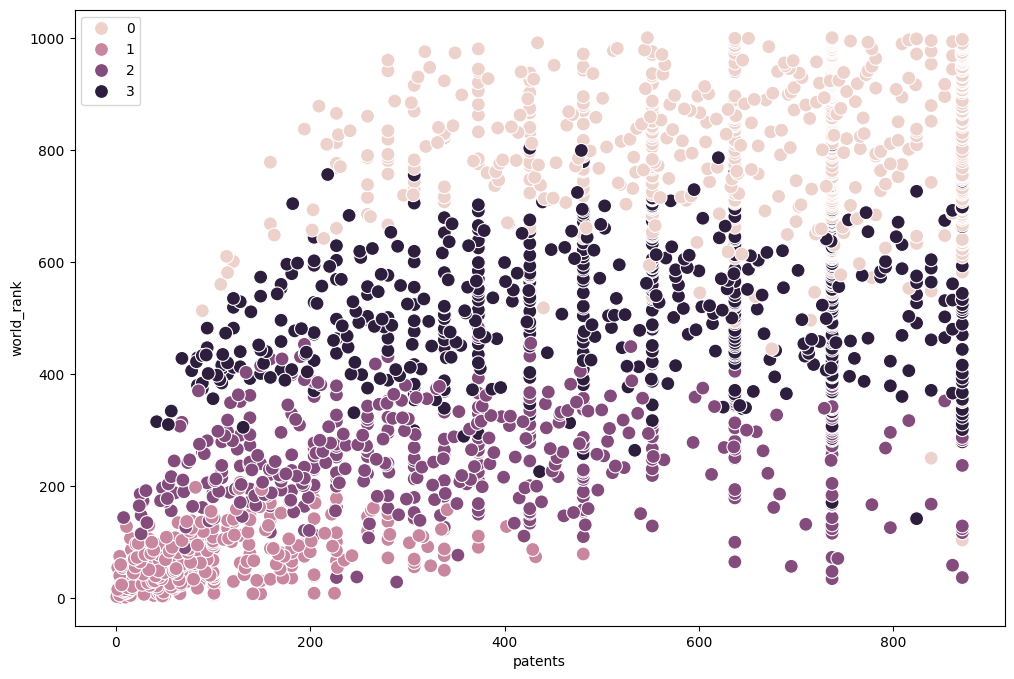

In [ ]:
# Plot the clusters for the "world_rank" and "patents" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['patents'], y=df['world_rank'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('patents') # Label x-axis.
plt.ylabel('world_rank') # Label y-axis.
plt.show()

**Patents vs World Rank**

The world rankings are generally positive, though there is some variability. In Cluster 2, among the top-ranking universities, patent rankings vary, but notably, none of the highly ranked universities have a patent rank below 500.

Additionally, our data shows a high concentration of top-ranking universities (as observed in the university ranking frequency table earlier). This concentration has led to many universities with high patent rankings, indicating a strong relationship between high world rankings and high patent rankings.

In Clusters 0, 1, and 3, the data points are more dispersed. However, as patent rankings decrease, the highest achievable world rank also tends to decline. Notably, there are very few universities in Clusters 0 and 1 that are among the top 200 in world rankings.

This suggests that a university's ability to secure patents does influence its likelihood of achieving a higher world rank, especially among the very top universities.

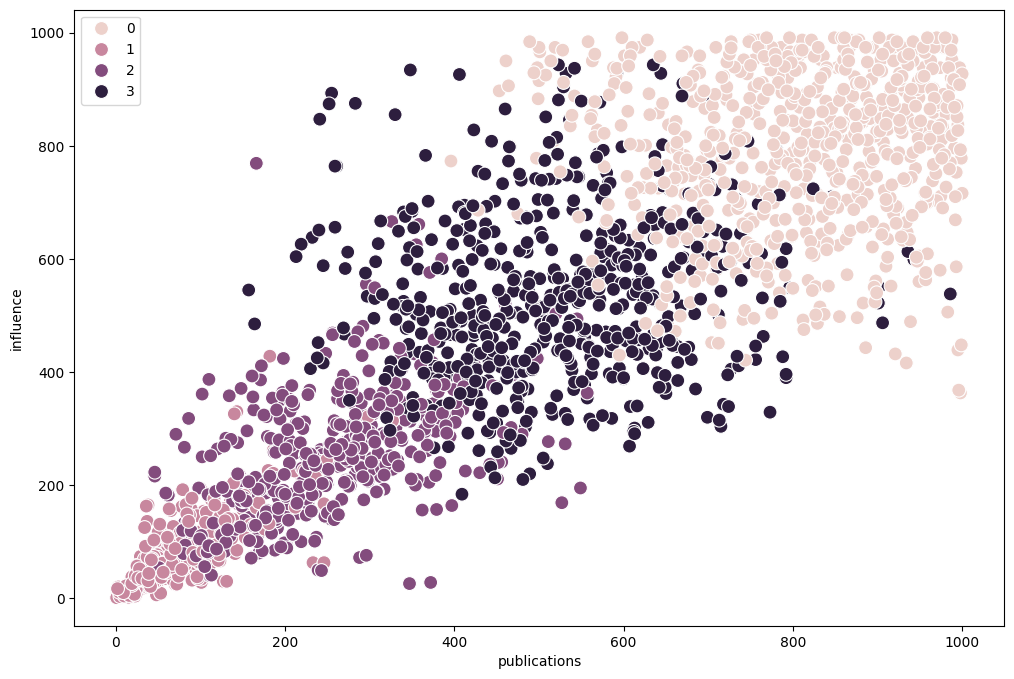

In [ ]:
# Plot the clusters for the "world_rank" and "citations" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['publications'], y=df['influence'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('publications') # Label x-axis.
plt.ylabel('influence') # Label y-axis.
plt.show()

**Publications VS Influence**

We can see that universities that have not produced as many publications are in cluster 1 and also have a low influence level.

There is a high concentration of universities that have a high publication ranking and a high influence ranking in cluster 2. Additionally, there is the biggest spread in data points in clusters 0 and 1.

This shows that the number of publications released doesn't have the biggest effect among clusters 0 and 1 in terms of influence level as there is quite a large spread of data points, however universities with a low publication rank as seen in cluster 3 will not be able to gain a high ranking influence.

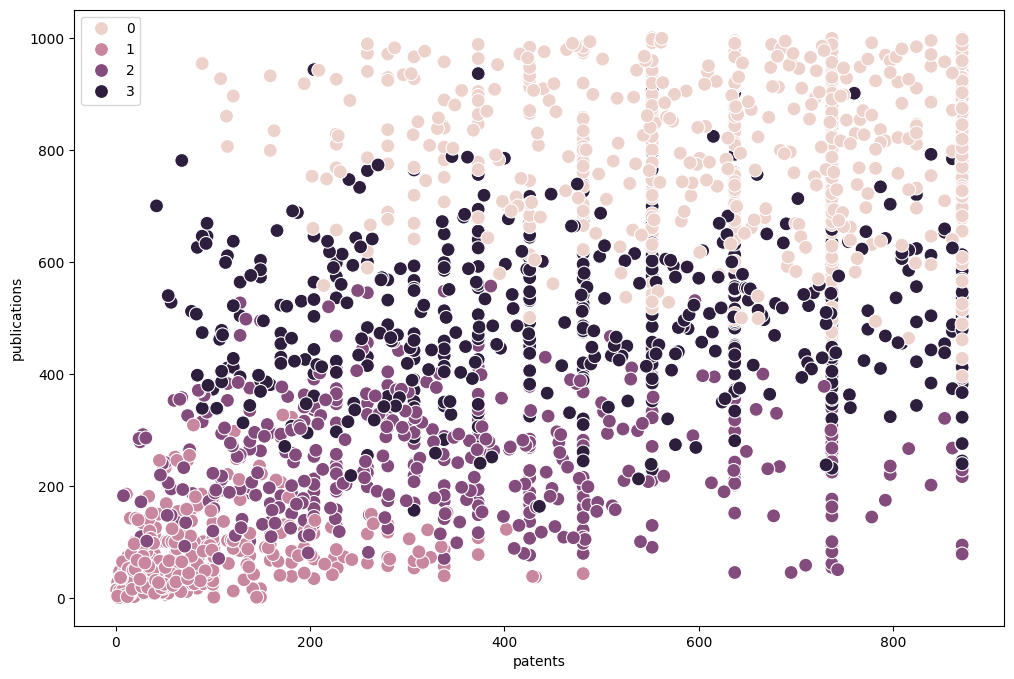

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['patents'], y=df['publications'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('patents') # Label x-axis.
plt.ylabel('publications') # Label y-axis.
plt.show()

**Patents vs Publications**

Patents - ranking of universities based on their performance in obtaining patents. Patents are a measure of the university's innovation and research output.

Publications - The number of research publications they have produced.

We can see that universities with a high patent rank generally have a higher publications rank (cluster 2). However among universities that have a much lower patent level the publication level varies greatly.

From this graph we can see that there is a great spread in data for clusters 0, 1 and 3, however universities with the highest patent rank meaning they have a high level of reseach output also have a high concentration of unversites with a high publication rank.

Therefore, this could mean to continue maintaing a high publication rank it is important to have a high patent level but not essential. For lower rank universities, there may still be other ways to improve their publication rank without necessarily obtaining more patents and improving their patent rank. As we can see on the graph there is a lot of variation among clusters.

# 4. Descriptive Statistics<a id='Dep'></a>

In [ ]:
# Basic descriptive statistics for each cluster
df.groupby('clusters').agg({
    'world_rank': ['mean', 'median'],
    'national_rank': ['mean', 'median'],
    'quality_of_education': ['mean', 'median'],
    'alumni_employment': ['mean', 'median'],
    'quality_of_faculty': ['mean', 'median'],
    'publications': ['mean', 'median'],
    'influence': ['mean', 'median'],
    'citations': ['mean', 'median'],
    'patents': ['mean', 'median']
})



world_rank        national_rank        quality_of_education         \
                mean median          mean median                 mean median   
clusters                                                                       
0         815.287770  827.0     53.635971   36.0           345.686331  355.0   
1          64.398268   60.5     18.872294    8.0           102.093074   83.5   
2         249.033040  248.0     35.337004   13.0           271.519824  320.0   
3         512.159593  509.0     45.115450   22.0           330.275042  355.0   

         alumni_employment        quality_of_faculty        publications  \
                      mean median               mean median         mean   
clusters                                                                   
0               472.559712  478.0         213.361151  218.0   806.692086   
1               115.290043  101.0          81.915584   67.5    72.534632   
2               358.387665  397.0         184.495595  210.0   250.973568   
3               409.602716  478.0         209.952462  210.0   515.611205   

                  influence          citations            patents         
         median        mean median        mean median        mean median  
clusters                                                                  
0         822.0  792.551079  814.0  673.080576  645.0  644.899281  721.0  
1          61.0   75.560606   63.0   72.564935   59.5   92.125541   77.5  
2         244.0  249.636564  243.5  240.132159  220.0  360.550661  338.0  
3         510.0  530.539898  517.0  507.949066  493.0  507.478778  534.0

**Interpretation**

We can see across all columns cluster 2 has the most high performing universities with the best world rank along with a high performace in all other catergories. There scores are significantly better than other clusters. We can can also see when looking at world rank for cluster 2 the difference between the mean and median is small signifying scores were very consistent in this category.


We can see that for quality of education and quality of faculty when looking at the median for clusters 0, 1 and 3 there is not much difference between them. This is also seen with median for alumni employment.

Cluster 3 contains the lower rated universities. We can see the ranking was significantly less favourable across all columns.

These results could be useful in categorising univerities overall ratings and therefore spliting universities into top ranking university clusters and lower ranking universities in a way that includes all data.

In [ ]:
# Export dataframe with clusters included

df.to_csv(os.path.join(path,'02 Data', 'Prepared_Data', 'df_data_cleaned_clusters.csv'))